# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [3]:
# Clean all column names of leading/trailing whitespace and invisible characters
data.columns = data.columns.str.strip()

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [4]:
category = data.groupby("ItemType")[["RetailSales", "RetailTransfers", "WarehouseSales"]].sum()
category

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


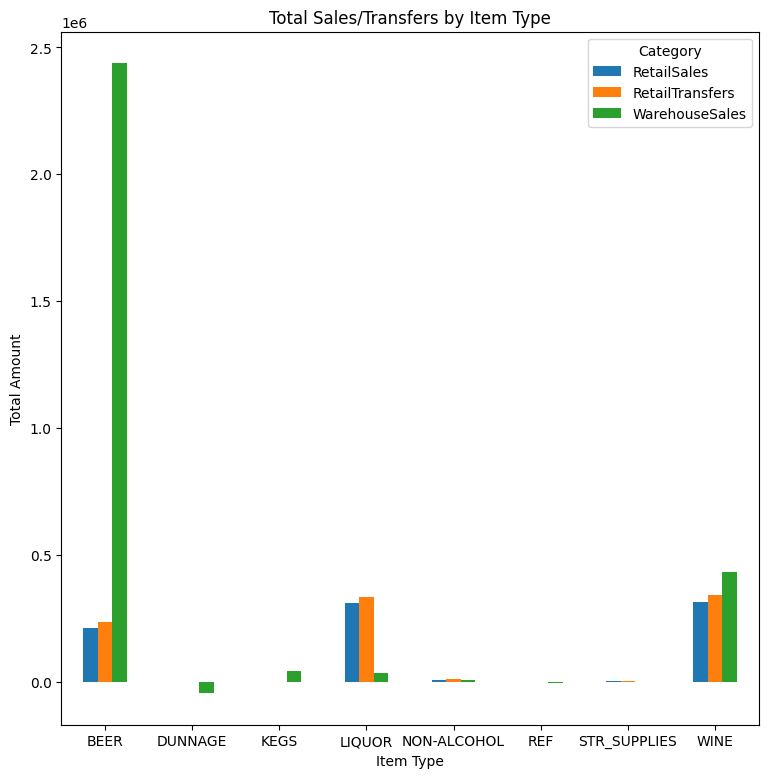

In [5]:
category.plot(kind="bar", figsize=(9,9))
plt.title("Total Sales/Transfers by Item Type")
plt.ylabel("Total Amount")
plt.xlabel("Item Type")
plt.xticks(rotation=0)
plt.legend(title="Category")

plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [6]:
# create a new column in data frame called 'TotalSales' that is the sum of RetailSales, RetailTransfers, and WarehouseSales
data['TotalSales'] = data['RetailSales'] + data['RetailTransfers'] + data['WarehouseSales']
data.head().sort_values(by='TotalSales', ascending=False)

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,TotalSales
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,8.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0,4.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0,2.0
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0,1.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0,1.0


In [9]:
total_sales = data.groupby("Supplier")[["RetailSales", "RetailTransfers", "WarehouseSales", "TotalSales"]].sum().sort_values(by="TotalSales", ascending=False).head(10)
total_sales

,RetailSales,RetailTransfers,WarehouseSales,TotalSales
Supplier,,,,
MILLER BREWING COMPANY,35022.63,39176.67,572623.41,646822.71
CROWN IMPORTS,26707.83,29561.67,579824.70,636094.20
ANHEUSER BUSCH INC,42559.14,47322.64,493856.19,583737.97
HEINEKEN USA,20923.17,23004.25,318812.59,362740.01
E & J GALLO WINERY,67455.63,75129.83,75594.99,218180.45
DIAGEO NORTH AMERICA INC,57656.36,62968.12,54252.88,174877.36
CONSTELLATION BRANDS,54472.51,60542.10,44968.76,159983.37
JIM BEAM BRANDS CO,39156.79,43020.59,2928.45,85105.83
THE WINE GROUP,25758.15,28462.05,26603.78,80823.98


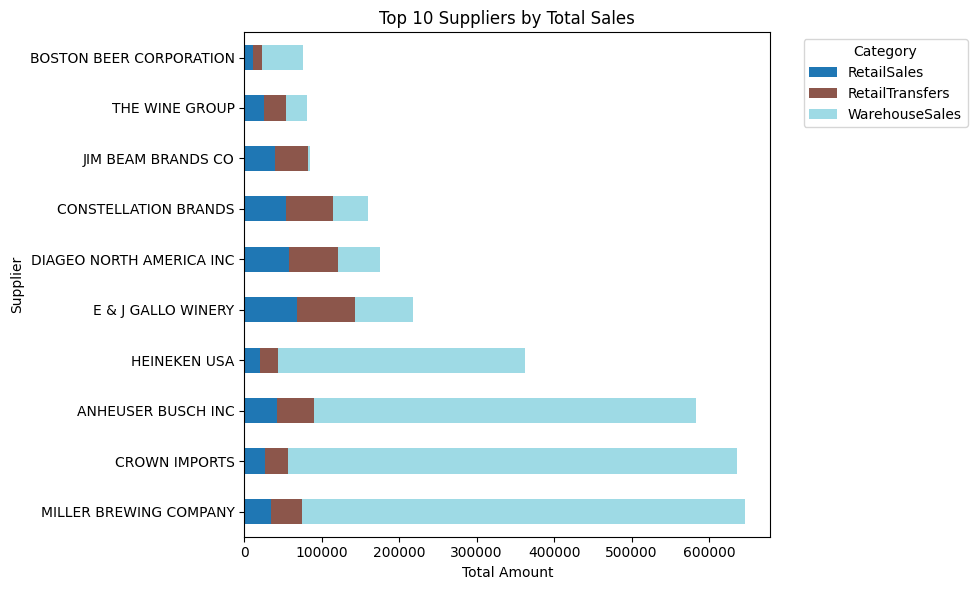

In [10]:
total_sales = data.groupby("Supplier")[["RetailSales", "RetailTransfers", "WarehouseSales", "TotalSales"]].sum().sort_values(by="TotalSales", ascending=False).head(10)

total_sales[['RetailSales', 'RetailTransfers', 'WarehouseSales']].plot(
    kind='barh',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)
plt.title("Top 10 Suppliers by Total Sales")
plt.xlabel("Total Amount")
plt.ylabel("Supplier")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [ ]:
# Create a new 'Date' column by combining 'Year' and 'Month'
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))

In [25]:
monthly_sales = data.groupby("Date")[["RetailSales", "RetailTransfers", "WarehouseSales"]].mean()
monthly_sales

,RetailSales,RetailTransfers,WarehouseSales
Date,,,
2017-04-01,0.000000,15.707503,0.000000
2017-05-01,7.038838,7.421817,27.310548
2017-06-01,7.143914,6.950396,27.839069
2017-08-01,6.409991,6.584726,28.122641
2017-09-01,6.757254,6.419721,22.817909
2017-10-01,6.549021,6.827827,22.289367
2017-11-01,6.765496,7.103699,23.348862
2017-12-01,9.078241,8.353759,21.169463
2018-01-01,5.679413,5.574833,19.072137


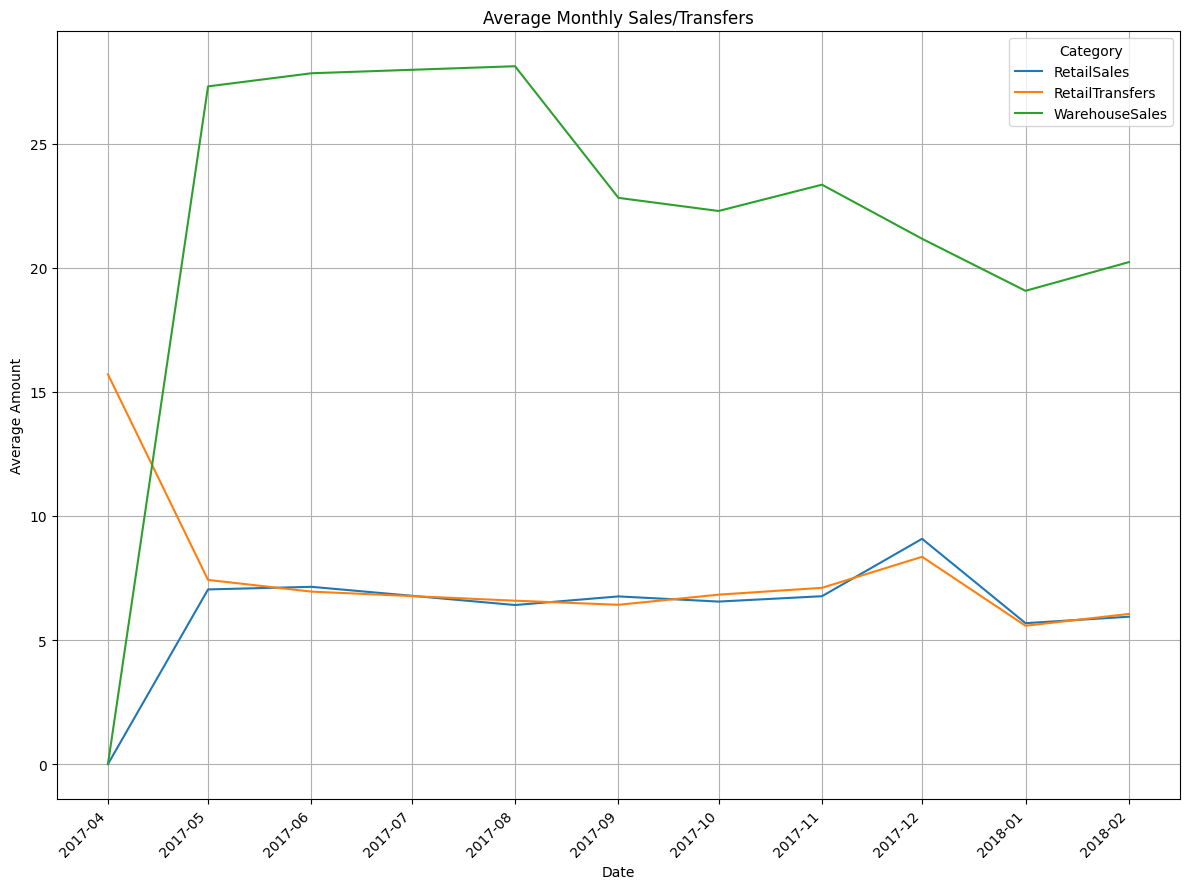

In [29]:
monthly_sales.plot(kind="line", figsize=(12,9))
plt.title("Average Monthly Sales/Transfers")
plt.ylabel("Average Amount")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Plot the same information as above but as a bar chart.

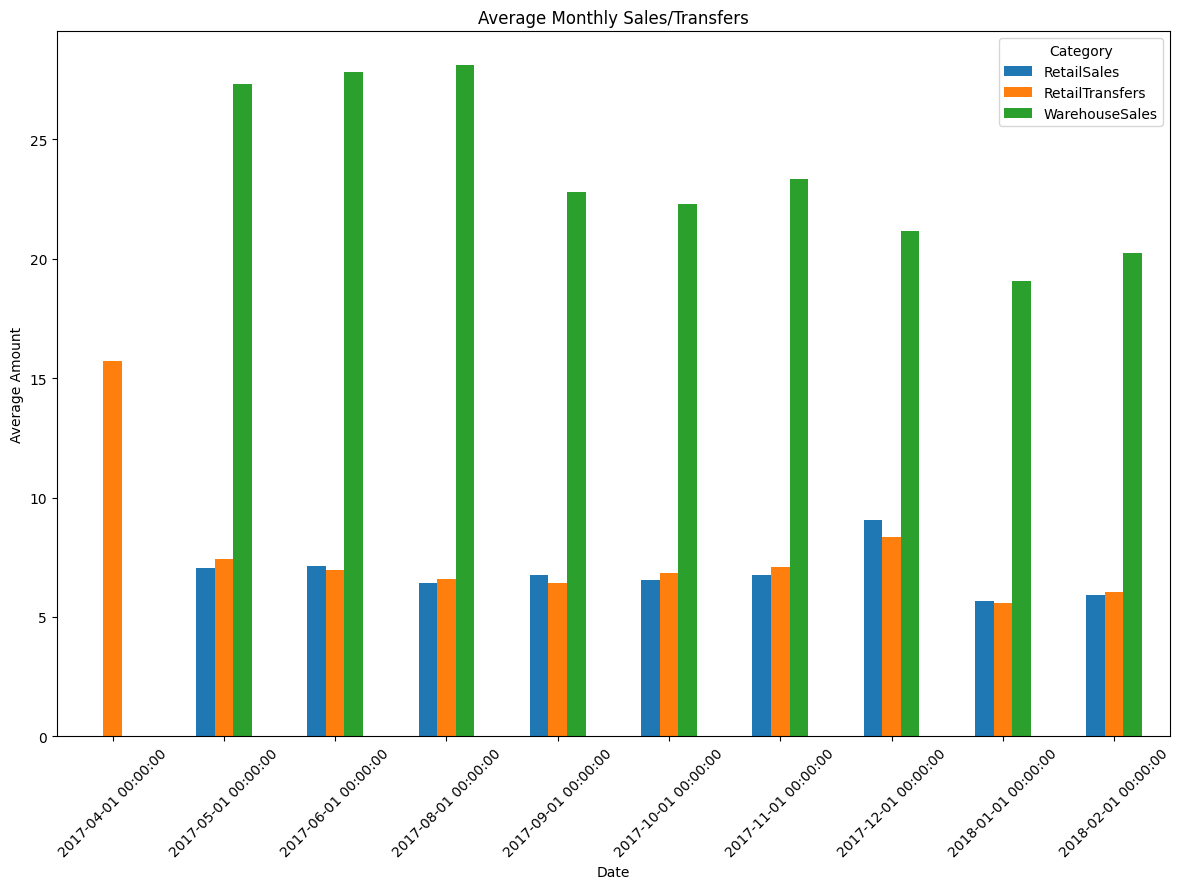

In [32]:
monthly_sales.plot(kind="bar", figsize=(12,9))
plt.title("Average Monthly Sales/Transfers")
plt.ylabel("Average Amount")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [53]:
total_retail = data.groupby(["Date", "ItemType"])[["RetailSales"]].sum()\
# Step 3: Convert the grouped Series back into a DataFrame for plotting
# The .reset_index() method turns the MultiIndex back into columns
plot_data = total_retail.reset_index()

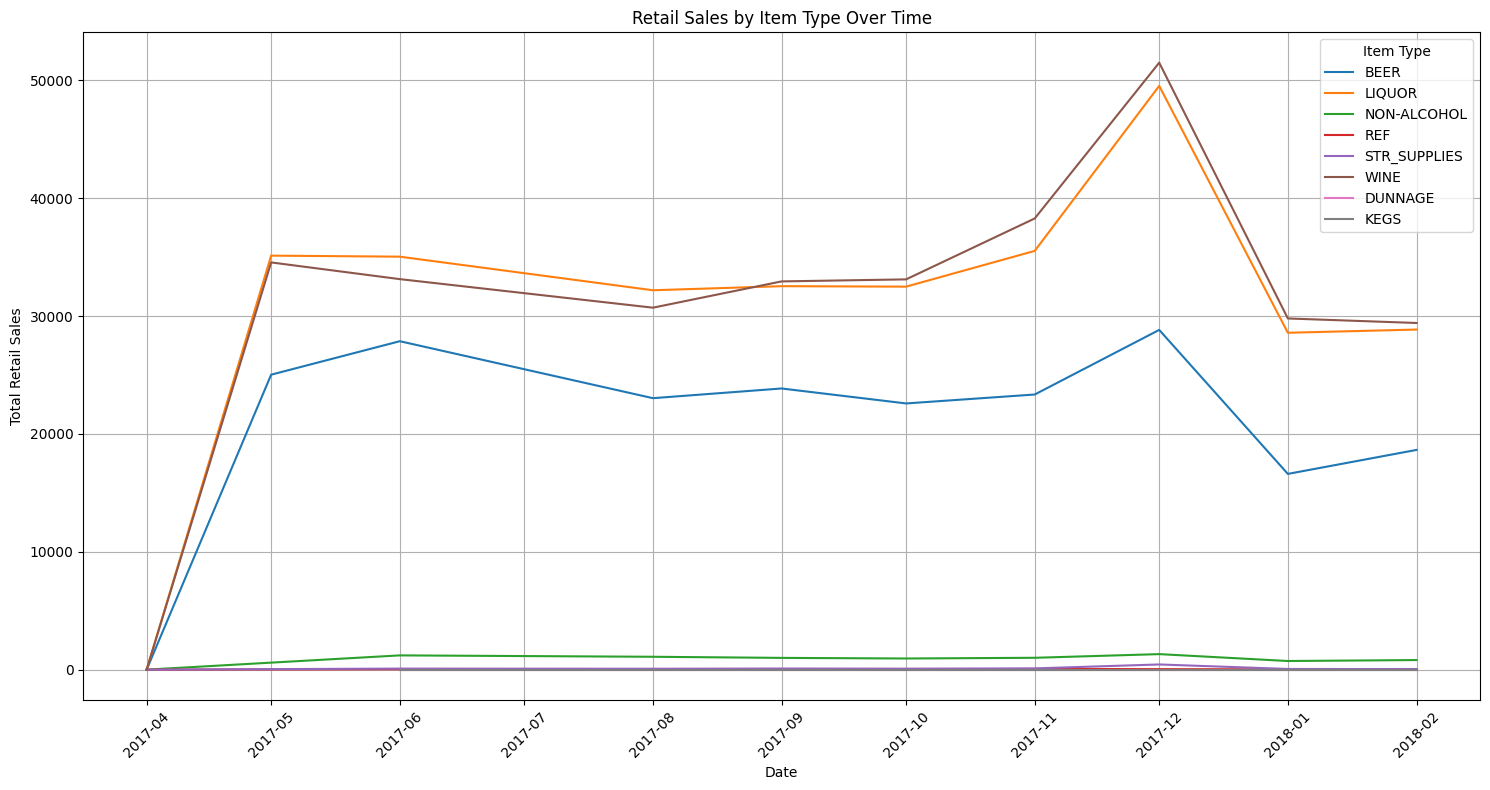

In [54]:
# Step 4: Use the new DataFrame to create the multi-line plot
plt.figure(figsize=(15, 8)) # You can adjust the size
sns.lineplot(data=plot_data, x="Date", y="RetailSales", hue="ItemType")

# Add a title and labels for clarity
plt.title('Retail Sales by Item Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Retail Sales')
plt.xticks(rotation=45)
plt.legend(title='Item Type')
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Plot the same information as above but as a bar chart.

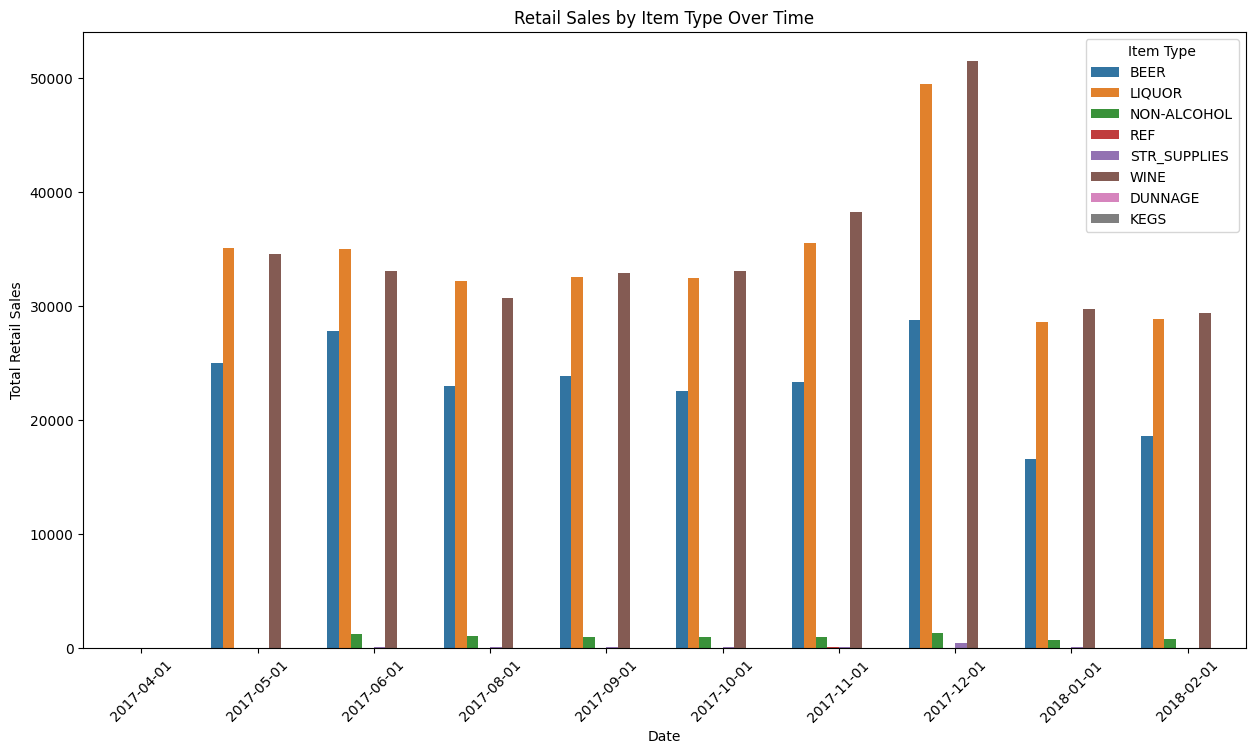

In [56]:
# Step 4: Use the new DataFrame to create the multi-line plot
plt.figure(figsize=(15, 8)) # You can adjust the size
sns.barplot(data=plot_data, x="Date", y="RetailSales", hue="ItemType")

# Add a title and labels for clarity
plt.title('Retail Sales by Item Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Retail Sales')
plt.xticks(rotation=45)
plt.legend(title='Item Type')
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

<Axes: xlabel='RetailSales', ylabel='RetailTransfers'>

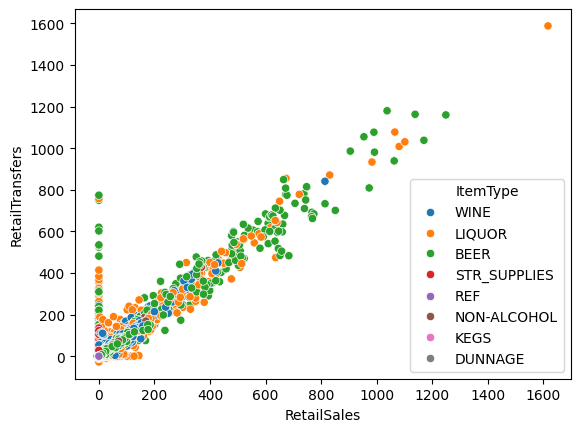

In [59]:
sns.scatterplot(x="RetailSales", y="RetailTransfers", hue="ItemType", data=data)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

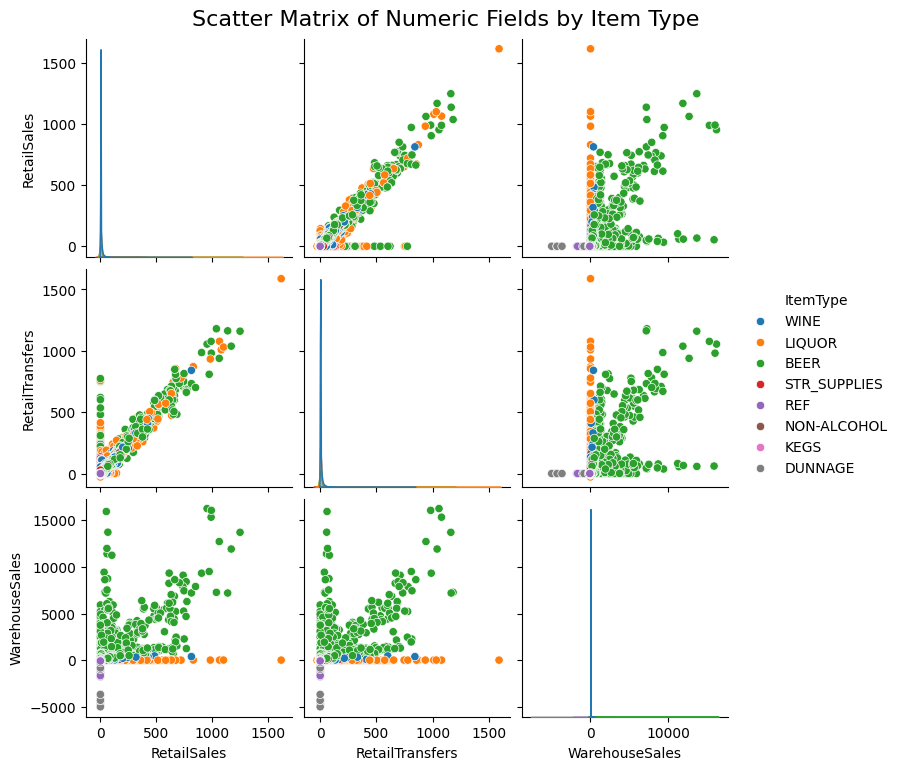

In [60]:
# Step 1: Identify the numeric columns
# From your previous images, these are 'RetailSales', 'RetailTransfers', and 'WarehouseSales'.
# You can select them manually or let the code do it.
numeric_cols = ['RetailSales', 'RetailTransfers', 'WarehouseSales']

# Step 2: Use seaborn.pairplot() to create the scatter matrix
# The `vars` parameter selects the columns to include in the plot.
# The `hue` parameter color-codes the plot points by the specified column.
sns.pairplot(data=data, vars=numeric_cols, hue="ItemType")

# Add a title and show the plot
plt.suptitle('Scatter Matrix of Numeric Fields by Item Type', y=1.02, fontsize=16)
plt.show()
